In [37]:
#Diagonalize matrix M

import numpy as np

def F(x, y):
    return np.exp(1j*y) + 2*np.exp(-1j*y/2) * np.cos(np.sqrt(3)/2 * x)

def matrix_M(x, y):
    return np.array([[0, F(x, y)], [np.conj(F(x, y)), 0]])

x_values = np.linspace(-np.pi, np.pi, 50)
y_values = np.linspace(-np.pi, np.pi, 50)

diagonalized_matrices = []
eigen_info_list = []
all_eigenvalues = []

for x in x_values:
    for y in y_values:
        M = matrix_M(x, y)
        eigenvalues, eigenvectors = np.linalg.eig(M)

        eigen_info = {
            'x': x,
            'y': y,
            'eigenvalues': eigenvalues,
            'eigenvectors': eigenvectors
        }

        eigen_info_list.append(eigen_info)

        D = np.diag(eigenvalues)

        P = eigenvectors

        M_diagonalized = np.dot(np.dot(np.linalg.inv(P), D), P)

        diagonalized_matrices.append(M_diagonalized)

for info in eigen_info_list:
    all_eigenvalues.append(info['eigenvalues'])

all_eigenvalues = np.array(all_eigenvalues)

print(diagonalized_matrices[90])
print(eigen_info_list[90])

[[-1.55431223e-15-1.11022302e-16j -1.34509285e+00-2.35898054e+00j]
 [-1.34509285e+00+2.35898054e+00j  0.00000000e+00+1.11022302e-16j]]
{'x': -3.0133643820146996, 'y': 1.98753820941395, 'eigenvalues': array([ 2.71552278-2.22044605e-16j, -2.71552278+2.22044605e-16j]), 'eigenvectors': array([[-0.35025458+0.6142652j,  0.70710678+0.j       ],
       [ 0.70710678+0.j       ,  0.35025458+0.6142652j]])}


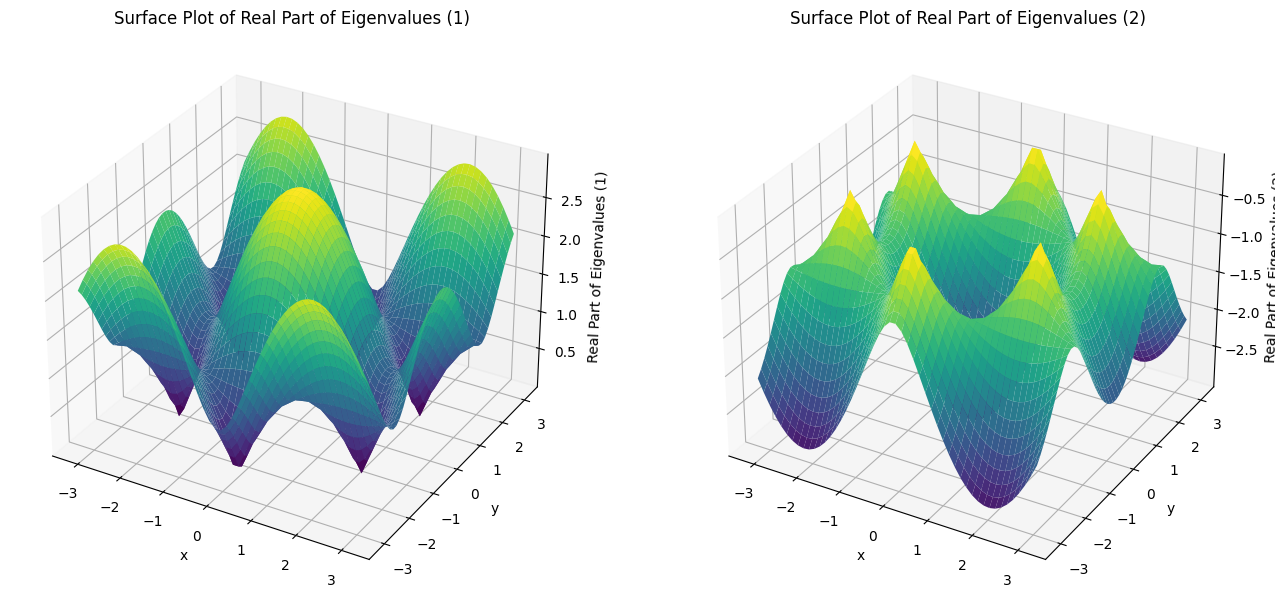

In [38]:
#Surface plot of eigenvalues

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

eigenvalues_real_1 = all_eigenvalues.real[:, 0]
eigenvalues_real_2 = all_eigenvalues.real[:, 1]

X, Y = np.meshgrid(x_values, y_values)

Z_1 = np.reshape(eigenvalues_real_1, X.shape)
Z_2 = np.reshape(eigenvalues_real_2, X.shape)

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z_1, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('Real Part of Eigenvalues (1)')
ax1.set_title('Surface Plot of Real Part of Eigenvalues (1)')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z_2, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Real Part of Eigenvalues (2)')
ax2.set_title('Surface Plot of Real Part of Eigenvalues (2)')

plt.show()
